<a href="https://colab.research.google.com/github/a151815058/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format',lambda x:'%.2f'% x)

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
sales_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/佐登妮絲/青年計劃/data3_project.csv')

In [29]:
sales_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04


In [30]:
sales_data.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26
1404434,PS5219002028,GAXFG2,真正除臭抗菌噴霧(銀離子迷迭香)350ml,8.00,2020-12-31,441.00,9100003039464.00,竹區,2020-12-23,2020-12-10


### Data Wrangling

In [31]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404435 entries, 0 to 1404434
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   InvoiceNo          1404435 non-null  object 
 1   StockCode          1404435 non-null  object 
 2   Description        1404435 non-null  object 
 3   Quantity           1404435 non-null  float64
 4   InvoiceDate        1404435 non-null  object 
 5   UnitPrice          1404435 non-null  float64
 6   CustomerID         1403724 non-null  float64
 7   Country            1404435 non-null  object 
 8   member_start_date  1366651 non-null  object 
 9   first_trans_date   1400412 non-null  object 
dtypes: float64(3), object(7)
memory usage: 107.2+ MB


In [32]:
sales_data.shape

(1404435, 10)

In [33]:
sales_data.Description.value_counts()

全背順氣活力SPA課程單堂                   58636
清除環境中腸病毒濕紙巾10抽                  52599
plus5智頻美塑儀課程單堂                  46660
(新)溫熱刮痧課程單堂                     34129
全身健康優化SPA課程單堂                   33770
                                ...  
新極線音波拉提100條(單堂200條專用)               1
如膠似漆ISLI59                          1
精準無痕保堤拉除皺鼻背紋/下巴放鬆(特惠)               1
背部淨化涵氧SPA課程單堂                       1
晶透亮白超皮秒透亮美肌加強版(S1 S2 S3)(原價)        1
Name: Description, Length: 870, dtype: int64

In [34]:
sales_data.isna().any()

InvoiceNo            False
StockCode            False
Description          False
Quantity             False
InvoiceDate          False
UnitPrice            False
CustomerID            True
Country              False
member_start_date     True
first_trans_date      True
dtype: bool

In [35]:
sales_data.drop(sales_data[sales_data['CustomerID'].isnull()].index,inplace=True)

In [36]:
sales_data.shape

(1403724, 10)

In [37]:
def transfer_revernue(row):
  if (row['Quantity'] < 0) & (row['UnitPrice']<0):
    return row['Quantity']*-row['UnitPrice']
  else:
    return row['Quantity']*row['UnitPrice']

In [38]:
sales_data['Revenue'] = sales_data.apply(transfer_revernue,axis=1)


In [39]:
sales_data.Revenue.describe()

count     1403724.00
mean        82668.84
std        922440.49
min     -41471304.00
25%          4672.00
50%          8752.00
75%         25904.00
max     702441768.00
Name: Revenue, dtype: float64

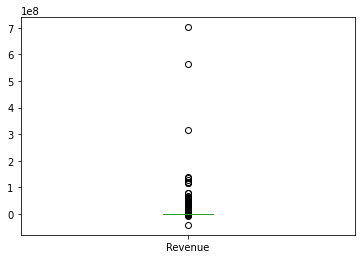

In [40]:
sales_data['Revenue'].plot.box()

In [41]:
sales_data1=sales_data.copy()

#### Z-score()

Outliers = Observations with z-scores > 3 or < -3



In [42]:
sales_data['Revenue_zcore']=(sales_data['Revenue']-sales_data['Revenue'].mean())/sales_data['Revenue'].std(ddof=0)
sales_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,Revenue_zcore
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,-0.08
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,-0.08
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,-0.08
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,-0.10
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,-0.08


In [43]:
sales_data['Outlier'] = abs(sales_data['Revenue_zcore']>3).astype(int)
sales_data.loc[sales_data['Outlier'] >0,['Revenue','Revenue_zcore']]
#sales_data[sales_data['Outlier'] >0 ].shape
#sales_data = sales_data[sales_data['Outlier'] == 0]
#sales_data.shape

,Revenue,Revenue_zcore
1699,4844064.00,5.16
4458,4023600.00,4.27
4668,5788320.00,6.19
5070,11329248.00,12.19
6362,4023600.00,4.27
...,...,...
1402112,6006792.00,6.42
1402113,4755136.00,5.07
1402115,5851016.00,6.25
1402120,17226552.00,18.59


In [44]:
sales_data.loc[sales_data['Outlier'] ==0,['Revenue','Revenue_zcore']]

,Revenue,Revenue_zcore
0,10072.00,-0.08
1,6712.00,-0.08
2,6712.00,-0.08
3,-12008.00,-0.10
4,5376.00,-0.08
...,...,...
1404430,47136.00,-0.04
1404431,2472.00,-0.09
1404432,8752.00,-0.08
1404433,2640.00,-0.09


In [45]:
sales_data = sales_data[sales_data['Outlier'] == 0]
sales_data.shape

(1403035, 13)

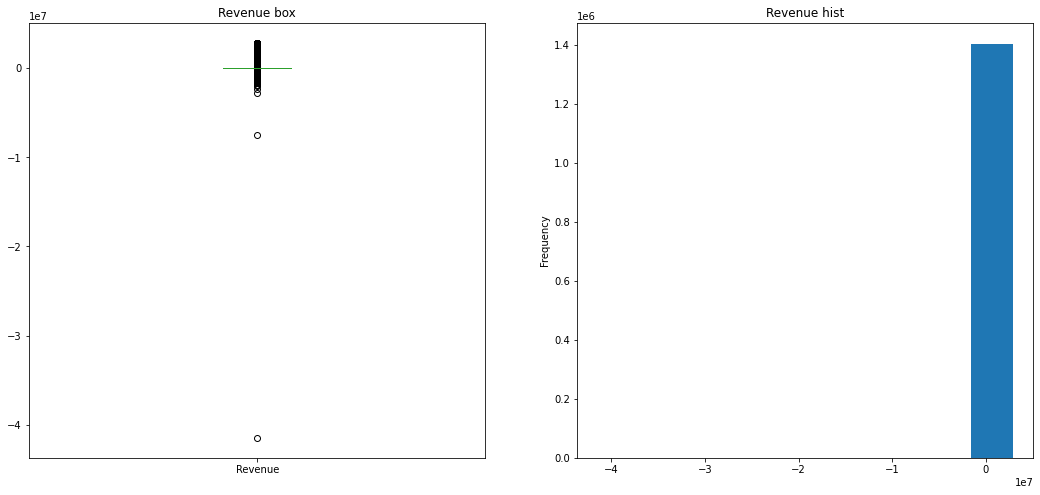

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1, 2,figsize=(18,8))
sales_data['Revenue'].plot.box(ax=axis[0])
axis[0].set_title('Revenue box')
sales_data['Revenue'].plot.hist(ax=axis[1])
axis[1].set_title('Revenue hist')
plt.show()

In [47]:
sales_data['Revenue'].describe()

count     1403035.00
mean        77058.27
std        239892.89
min     -41471304.00
25%          4672.00
50%          8752.00
75%         25672.00
max       2844192.00
Name: Revenue, dtype: float64

#### IQR
IQR = Q3 - Q1

Outliers = Observations > Q3 + 1.5*IQR  or  Q1 – 1.5*IQR



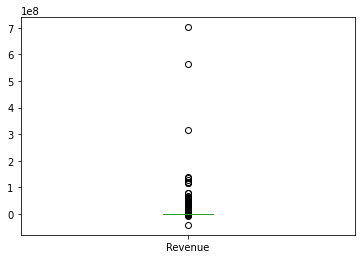

In [48]:
sales_data1['Revenue'].plot.box()

In [49]:
def Outlier_treatment(datacolumn):
  Q1,Q3 = np.percentile(datacolumn,[25,75])
  IQR = Q3-Q1
  lower_range = Q1 - (1.5 * IQR)
  high_range = Q3 + (1.5 * IQR)
  return lower_range,high_range

In [50]:
lowerbound,highbound = Outlier_treatment(sales_data1['Revenue'])

sales_data1[(sales_data1['Revenue'] < lowerbound) | (sales_data1['Revenue']>highbound)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
9,PS5262016031,HA89A01,肌因彈潤課程單堂,48.00,2019-01-01,9559.00,9100000407160.00,竹區,2007-01-02,2012-07-28,458832.00
10,PS5262016032,HB90A01,全背順氣活力SPA課程單堂,96.00,2019-01-01,11559.00,9100000407160.00,竹區,2007-01-02,2012-07-28,1109664.00
13,PS530A050714,FB40A01,旗艦暖宮腹活SPA課程單堂,96.00,2019-01-01,13259.00,9100002554883.00,中區,2018-10-18,2018-10-18,1272864.00
19,PS5323017890,K0464B,DC龍血緊緻修護面膜26ml+5g-單包,-56.00,2019-01-01,-1006.00,9100000045758.00,中區,2001-05-20,2012-07-17,-56336.00
31,PS5213017253,HA50A01,胜肽美顏SPA護理單堂,48.00,2019-01-01,6059.00,9100001531076.00,台北B區,2013-11-23,2013-04-09,290832.00
...,...,...,...,...,...,...,...,...,...,...,...
1404400,PS5324024939,JAA3G2,玻尿酸超保濕精華96%原液60ml,16.00,2020-12-31,4239.00,9100000043037.00,中區,2004-11-11,2012-07-23,67824.00
1404401,PS5324024939,KQ02,玫瑰晶萃活膚液130ml,24.00,2020-12-31,5395.00,9100000043037.00,中區,2004-11-11,2012-07-23,129480.00
1404418,PS5324024940,KQ06,玫瑰晶萃瞬效霜30ml,16.00,2020-12-31,4083.00,9100000706055.00,中區,2011-12-21,2014-03-10,65328.00
1404421,PS5324024940,MAA7G1,白金密集煥白面膜18ml*6pcs,32.00,2020-12-31,6923.00,9100000706055.00,中區,2011-12-21,2014-03-10,221536.00


In [51]:
sales_data1.drop(sales_data1[(sales_data1['Revenue'] < lowerbound) | (sales_data1['Revenue']>highbound)].index,inplace=True)

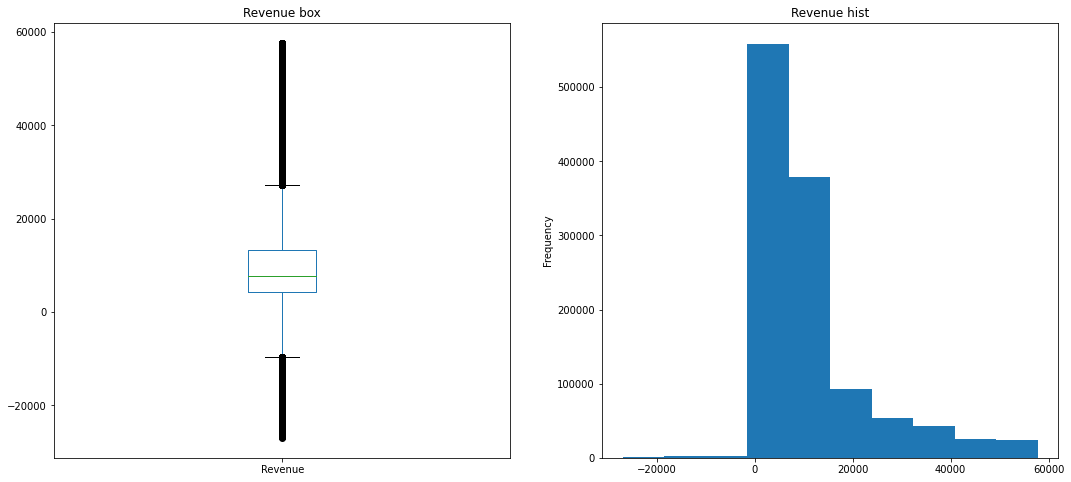

In [52]:
figure, axis = plt.subplots(1, 2,figsize=(18,8))
sales_data1['Revenue'].plot.box(ax=axis[0])
axis[0].set_title('Revenue box')
sales_data1['Revenue'].plot.hist(ax=axis[1])
axis[1].set_title('Revenue hist')
plt.show()

In [53]:
sales_data1.shape

(1181196, 11)

### EDA

#### Monthly Revenue

In [54]:
sales_data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00


In [55]:
sales_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181196 entries, 0 to 1404434
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   InvoiceNo          1181196 non-null  object 
 1   StockCode          1181196 non-null  object 
 2   Description        1181196 non-null  object 
 3   Quantity           1181196 non-null  float64
 4   InvoiceDate        1181196 non-null  object 
 5   UnitPrice          1181196 non-null  float64
 6   CustomerID         1181196 non-null  float64
 7   Country            1181196 non-null  object 
 8   member_start_date  1144520 non-null  object 
 9   first_trans_date   1177960 non-null  object 
 10  Revenue            1181196 non-null  float64
dtypes: float64(4), object(7)
memory usage: 108.1+ MB


In [56]:
sales_data1['InvoiceDate'] = pd.to_datetime(sales_data1['InvoiceDate'])
sales_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181196 entries, 0 to 1404434
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   InvoiceNo          1181196 non-null  object        
 1   StockCode          1181196 non-null  object        
 2   Description        1181196 non-null  object        
 3   Quantity           1181196 non-null  float64       
 4   InvoiceDate        1181196 non-null  datetime64[ns]
 5   UnitPrice          1181196 non-null  float64       
 6   CustomerID         1181196 non-null  float64       
 7   Country            1181196 non-null  object        
 8   member_start_date  1144520 non-null  object        
 9   first_trans_date   1177960 non-null  object        
 10  Revenue            1181196 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 108.1+ MB


In [57]:
sales_data1['YearMonth'] = sales_data1['InvoiceDate'].map(lambda date:100 * date.year+date.month)
sales_data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,201901
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901


In [58]:
tx_revenue = sales_data1.groupby(['YearMonth'])['Revenue'].sum().reset_index()
tx_revenue

,YearMonth,Revenue
0,201901,425743824.00
1,201902,300617976.00
2,201903,699778888.00
3,201904,516812544.00
4,201905,551044368.00
5,201906,453681976.00
6,201907,480213760.00
7,201908,500785128.00
8,201909,553368896.00
9,201910,643763416.00


In [59]:
tx_revenue['YearMonth'] = tx_revenue['YearMonth'].astype(str)
tx_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  24 non-null     object 
 1   Revenue    24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes


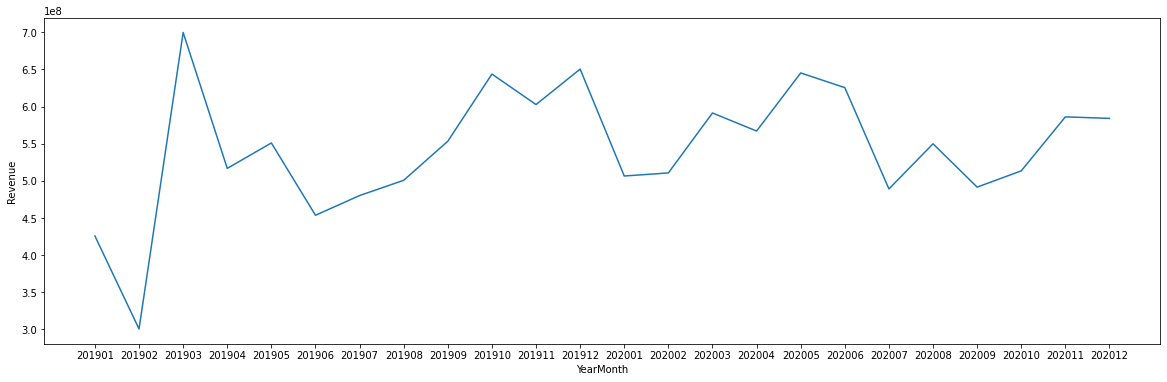

In [60]:
figure,axes = plt.subplots(figsize=(20,6))
sns.lineplot(ax = axes,x='YearMonth',y='Revenue',data=tx_revenue)
plt.show()

#### Monthly growth rate

In [61]:
tx_revenue['GrowthRate'] = tx_revenue['Revenue'].pct_change()
tx_revenue

,YearMonth,Revenue,GrowthRate
0,201901,425743824.00,nan
1,201902,300617976.00,-0.29
2,201903,699778888.00,1.33
3,201904,516812544.00,-0.26
4,201905,551044368.00,0.07
5,201906,453681976.00,-0.18
6,201907,480213760.00,0.06
7,201908,500785128.00,0.04
8,201909,553368896.00,0.11
9,201910,643763416.00,0.16


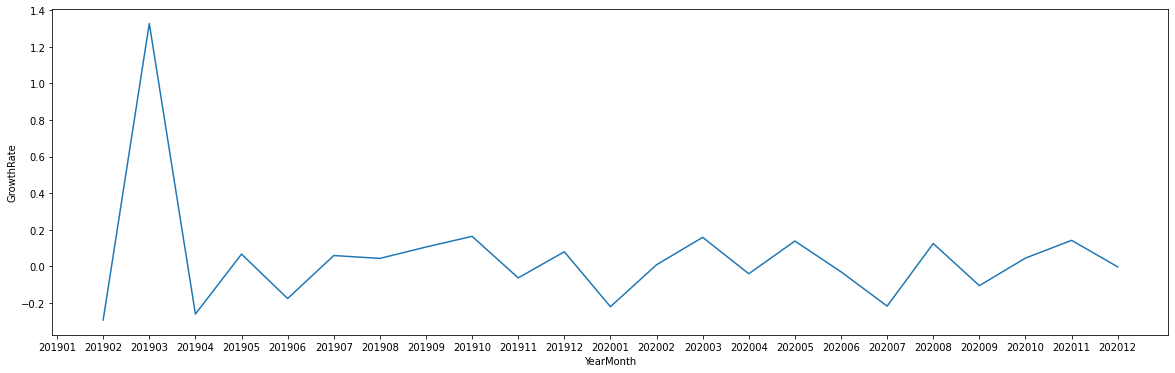

In [62]:
figure,axes = plt.subplots(figsize=(20,6))
sns.lineplot(ax = axes,x='YearMonth',y='GrowthRate',data=tx_revenue)
plt.show()

#### Monthly Order Count​

In [63]:
sales_data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,201901
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901


In [64]:
tx_sales_qty = sales_data1.groupby(['YearMonth'])['Quantity'].sum().reset_index()
tx_sales_qty

,YearMonth,Quantity
0,201901,372096.00
1,201902,243576.00
2,201903,760144.00
3,201904,514888.00
4,201905,489304.00
5,201906,406304.00
6,201907,407536.00
7,201908,449040.00
8,201909,453488.00
9,201910,648960.00


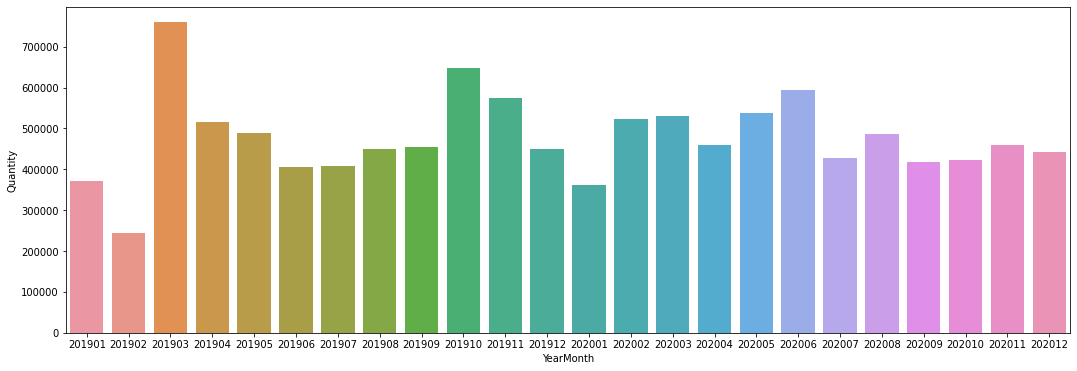

In [65]:
figure,axes = plt.subplots(figsize=(18,6))
sns.barplot(x='YearMonth',y='Quantity',data=tx_sales_qty,ax=axes)
plt.show()

#### Average Revenue per Order​

In [66]:
sales_data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,201901
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901


In [67]:
tx_revenue_avg = sales_data1.groupby(['YearMonth'])['Revenue'].mean().reset_index()
tx_revenue_avg

,YearMonth,Revenue
0,201901,9859.97
1,201902,10893.93
2,201903,9157.61
3,201904,10094.59
4,201905,10560.05
5,201906,10836.53
6,201907,11346.94
7,201908,10429.33
8,201909,11319.58
9,201910,13218.15


In [68]:
tx_revenue_avg['YearMonth'] = tx_revenue_avg['YearMonth'].astype(str)

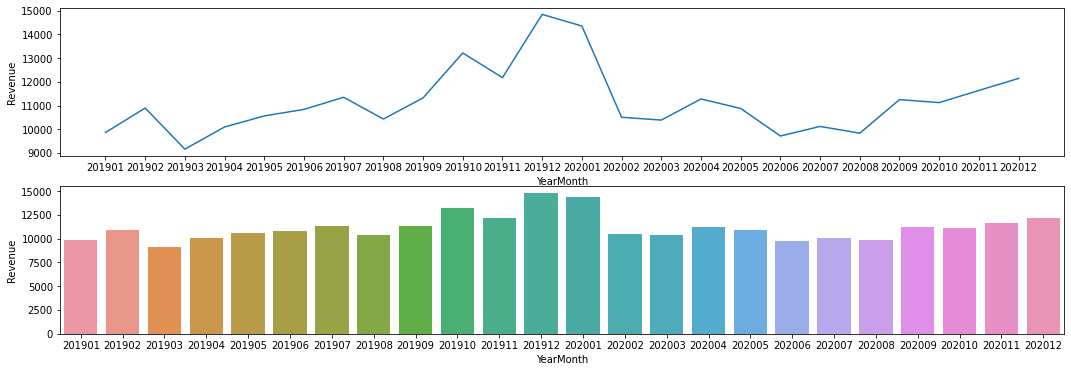

In [69]:
figure,axes = plt.subplots(2,1,figsize=(18,6))
sns.lineplot(x='YearMonth',y='Revenue',data=tx_revenue_avg,ax=axes[0])
sns.barplot(x='YearMonth',y='Revenue',data=tx_revenue_avg,ax=axes[1])
plt.show()

#### Monthly Active Customers​

In [70]:
tx_monthly_actives = sales_data1.groupby(['YearMonth'])['CustomerID'].nunique().reset_index()
tx_monthly_actives

,YearMonth,CustomerID
0,201901,11061
1,201902,8593
2,201903,15972
3,201904,11846
4,201905,12569
5,201906,11159
6,201907,10981
7,201908,12747
8,201909,12498
9,201910,14506


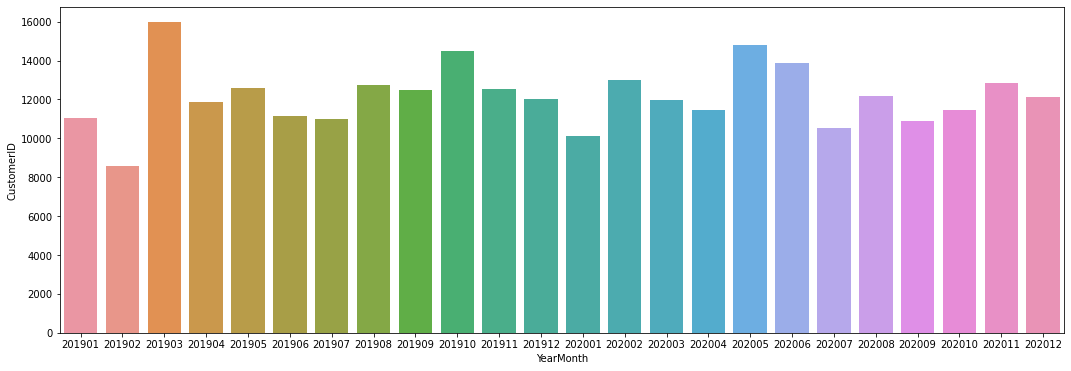

In [71]:
figure,axes1 = plt.subplots(figsize=(18,6))
sns.barplot(x='YearMonth',y='CustomerID',data=tx_monthly_actives,ax=axes1)
plt.show()

In [72]:
tx_monthly_actives['YearMonth'] = tx_monthly_actives['YearMonth'].astype(str)
tx_monthly_actives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YearMonth   24 non-null     object
 1   CustomerID  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


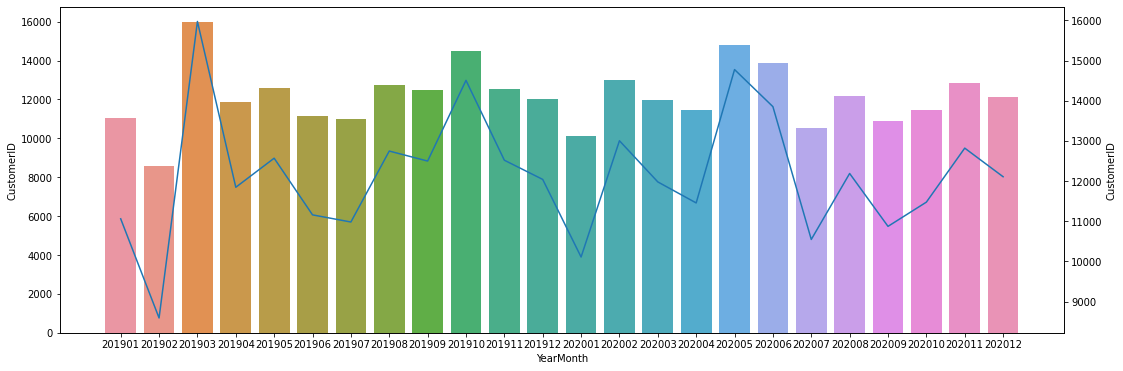

In [73]:
figure,axes1 = plt.subplots(figsize=(18,6))
sns.barplot(x='YearMonth',y='CustomerID',data=tx_monthly_actives,ax=axes1)
axes2 = axes1.twinx()
sns.lineplot(x='YearMonth',y='CustomerID',data=tx_monthly_actives,ax=axes2)
plt.show()

#### Revenue per month for New and Existing Customers

In [74]:
sales_data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,201901
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901


In [75]:
sales_data1['customer_type'] = 'New'
#sales_data1.head()
sales_data1['member_start_date'] = pd.to_datetime(sales_data1['member_start_date'] )
sales_data1.loc[sales_data1['InvoiceDate'] > sales_data1['member_start_date'],'customer_type']='Existing'
sales_data1.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth,customer_type
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901,New
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901,Existing
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901,Existing
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,201901,Existing
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901,Existing
5,PS5444006920,K8018,植粹養護潤髮乳475ml,8.00,2019-01-01,549.00,9100002426142.00,南區,2017-12-19,2017-12-19,4392.00,201901,Existing
6,PS5444006920,K8018,植粹養護潤髮乳475ml,8.00,2019-01-01,549.00,9100002426142.00,南區,2017-12-19,2017-12-19,4392.00,201901,Existing
7,PS5171012881,KZ01,冰河淨化潔顏慕絲150ml,8.00,2019-01-01,995.00,9100000301403.00,台北A區,2005-03-02,2013-08-10,7960.00,201901,Existing
8,PS5262016031,J0033,緊緻俏麗霜150ml,8.00,2019-01-01,59.00,9100000407160.00,竹區,2007-01-02,2012-07-28,472.00,201901,Existing
11,PS5262016032,J0033,緊緻俏麗霜150ml,8.00,2019-01-01,59.00,9100000407160.00,竹區,2007-01-02,2012-07-28,472.00,201901,Existing


In [76]:
tx_customer_type_revenue = sales_data1.groupby(['YearMonth','customer_type'])['Revenue'].sum().reset_index()
tx_customer_type_revenue

,YearMonth,customer_type,Revenue
0,201901,Existing,404080816.00
1,201901,New,21663008.00
2,201902,Existing,279155824.00
3,201902,New,21462152.00
4,201903,Existing,675617712.00
5,201903,New,24161176.00
6,201904,Existing,497082520.00
7,201904,New,19730024.00
8,201905,Existing,526940648.00
9,201905,New,24103720.00


In [77]:
tx_customer_type_revenue['YearMonth']=tx_customer_type_revenue['YearMonth'].astype(str)

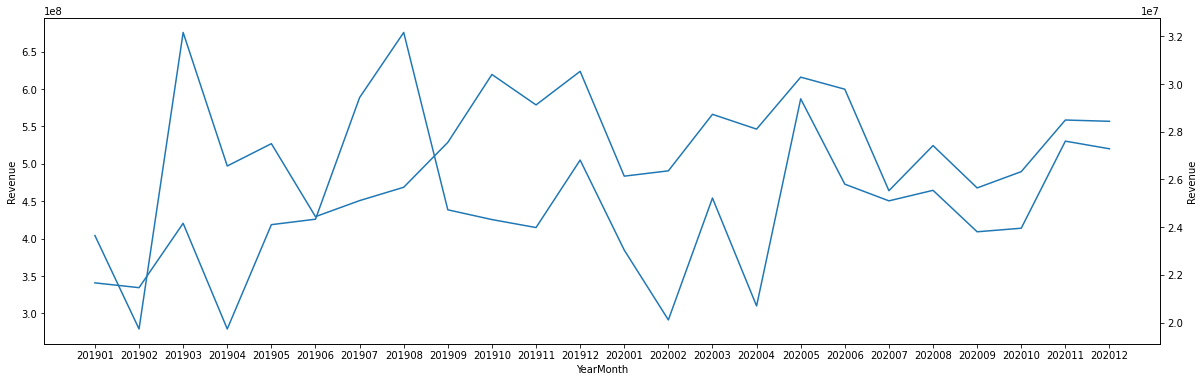

In [78]:
figure,axes = plt.subplots(figsize=(20,6))
sns.lineplot(x='YearMonth',y='Revenue',data=tx_customer_type_revenue.loc[tx_customer_type_revenue['customer_type'] == 'Existing'],ax=axes,)
axes2 = axes.twinx()
sns.lineplot(x='YearMonth',y='Revenue',data=tx_customer_type_revenue.loc[tx_customer_type_revenue['customer_type'] == 'New'],ax=axes2)
plt.show()

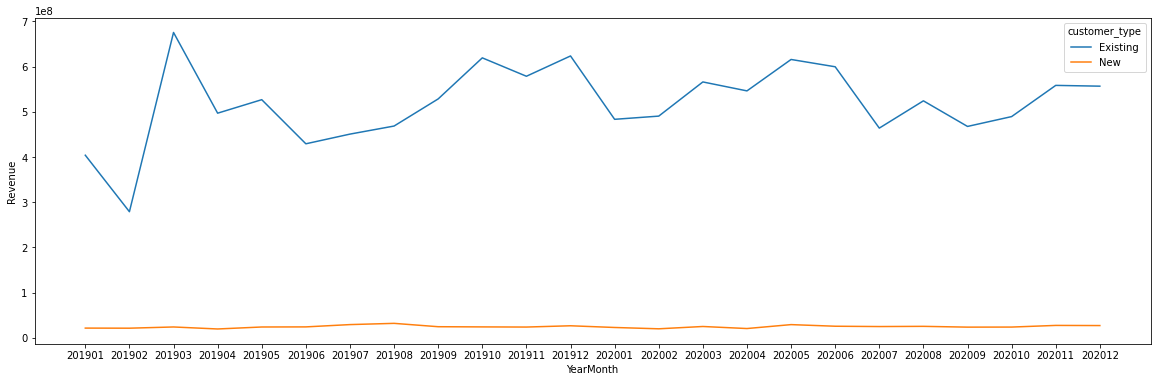

In [79]:
figure,axes = plt.subplots(figsize=(20,6))
sns.lineplot(x='YearMonth',y='Revenue',data=tx_customer_type_revenue,ax=axes,hue="customer_type")
plt.show()

#### New Customer Ratio​

新客戶比例 - 新客戶數/目前已存在客戶

In [80]:
tx_user_ratio = sales_data1.query("customer_type == 'New'").groupby(['YearMonth'])['CustomerID'].nunique()/sales_data1.query("customer_type == 'Existing'").groupby(['YearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()
tx_user_ratio

,YearMonth,CustomerID
0,201901,0.15
1,201902,0.18
2,201903,0.10
3,201904,0.12
4,201905,0.15
5,201906,0.15
6,201907,0.15
7,201908,0.14
8,201909,0.12
9,201910,0.10


In [81]:
tx_user_ratio['YearMonth'] = tx_user_ratio['YearMonth'].astype(str)

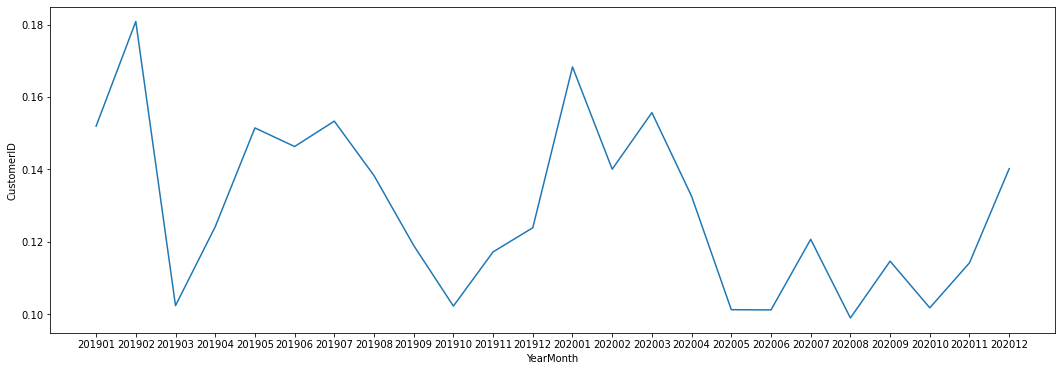

In [82]:
figure,axes = plt.subplots(figsize=(18,6))
sns.lineplot(x='YearMonth',y='CustomerID',data=tx_user_ratio,ax=axes)
plt.show()

#### Monthly Retention Rate
Retention rate should be monitored very closely because it indicates how sticky is yourservice and how well your product fits the market. For making Monthly Retention Ratevisualized, we need to calculate how many customers retained from previous month.

Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total

用戶留存率 - 有多少客戶繼續使用你的應用程式、產品或服務就是所謂的留存率。這是一項關鍵績效指標 (KPI)，可指示您滿足用戶需求的程度以及您是否提供了良好的客戶體驗。留存特別重要，因為與留存現有客戶相比，贏得新客戶的成本高出五倍，同時回頭客往往會產生更多的收入。即使留存率只有小幅進步，對獲利能力和永續性也會造成很大的影響。

計算用戶留存率需要哪些資訊:

用戶行為 時間範圍 參考網站: https://www.mobilespoon.net/2019/07/cohort-analysis-retention-rate.html

使用套件說明:

.crosstab() - 交叉表(converts it to retention table)

In [103]:
sales_data1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth,customer_type
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901,New
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901,Existing
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901,Existing
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,201901,Existing
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901,Existing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11,47136.00,202012,Existing
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2472.00,202012,Existing
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26,8752.00,202012,Existing
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2640.00,202012,Existing


In [104]:
#identify which users are active by looking at their revenue per month
tx_user_purchase = sales_data1.groupby(['CustomerID','YearMonth'])['Revenue'].sum().reset_index()
tx_user_purchase

,CustomerID,YearMonth,Revenue
0,9100000000061.00,201901,51016.00
1,9100000000061.00,201903,18000.00
2,9100000000061.00,201905,75488.00
3,9100000000061.00,201907,5272.00
4,9100000000061.00,201910,25584.00
...,...,...,...
291676,9100003171280.00,202007,3272.00
291677,9100003171280.00,202008,20112.00
291678,9100003171280.00,202009,4464.00
291679,9100003171280.00,202011,92720.00


In [105]:
#create retention matrix with crosstab
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['YearMonth']).reset_index()
tx_retention

YearMonth,CustomerID,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012
0,9100000000061.00,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,9100000000085.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0
2,9100000000092.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9100000000115.00,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0
4,9100000000170.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78439,9100003125563.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
78440,9100003140535.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
78441,9100003149890.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
78442,9100003151982.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = tx_retention.columns[1:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['YearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    #print(tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month])
    #主要計算目前selected_month的月份還有使用的人數
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    #print(retention_data)


    
#convert the array to dataframe and calculate Retention Rate
tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']
tx_retention


,YearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201902,8593,3074,0.36
1,201903,15972,4114,0.26
2,201904,11846,5015,0.42
3,201905,12569,3888,0.31
4,201906,11159,3749,0.34
5,201907,10981,3304,0.30
6,201908,12747,4081,0.32
7,201909,12498,4466,0.36
8,201910,14506,4077,0.28
9,201911,12519,4570,0.37


In [107]:
tx_retention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YearMonth          23 non-null     int64  
 1   TotalUserCount     23 non-null     int64  
 2   RetainedUserCount  23 non-null     int64  
 3   RetentionRate      23 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 864.0 bytes


In [108]:
tx_retention['YearMonth'] = tx_retention['YearMonth'].astype(str)

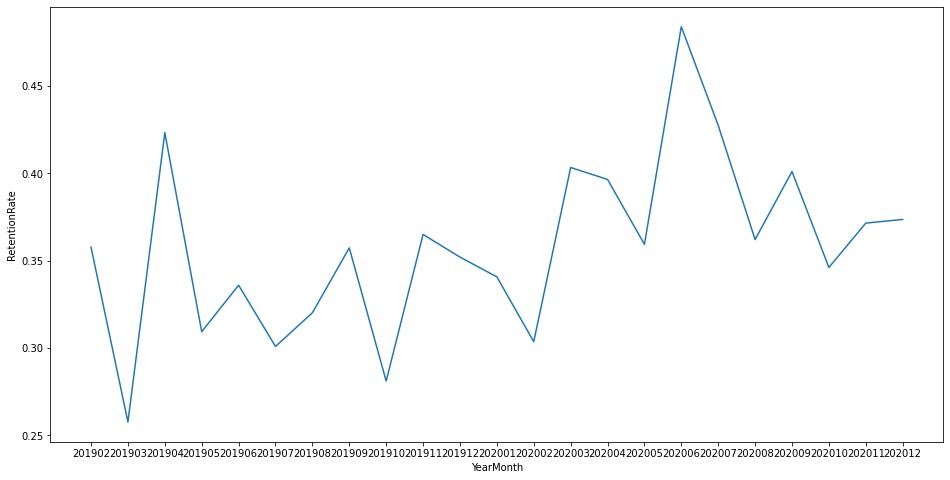

In [109]:
fig,axes = plt.subplots(figsize=(16,8))
sns.lineplot(x='YearMonth',y='RetentionRate',data=tx_retention,ax=axes)
plt.show()

### Customer Segmentation(Cluster)

Now we are going to implement one of them to our business: RFM. RFM stands for Recency - Frequency - Monetary Value. Theoretically we will have segments like below:

* Low Value: Customers who are less active than others, not very frequent buyer/visitor and generates very low - zero - maybe negative revenue.
* Mid Value: In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue.
* High Value: The group we don’t want to lose. High Revenue, Frequency and low Inactivity.
As the methodology, we need to calculate Recency, Frequency and Monetary Value (we will call it Revenue from now on) and apply unsupervised machine learning to identify different groups (clusters) for each. Let’s jump into coding and see how to do RFM Clustering.

In [112]:
sales_data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth,customer_type
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901,New
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901,Existing
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901,Existing
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,201901,Existing
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901,Existing


#### Recency

In [113]:
#create tx_user for assigning clustering
sales_data_user= pd.DataFrame(sales_data1['CustomerID'].unique())
sales_data_user.columns = ['CustomerID']

#get the max purchase date for each customer and create a dataframe with it
tx_max_purchase = sales_data1.groupby('CustomerID').InvoiceDate.max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days

sales_data_user = pd.merge(sales_data_user, tx_max_purchase[['CustomerID','Recency']], on='CustomerID')


#we take our observation point as the max invoice date in our dataset
#.max() - 取得MaxPurchaseDate欄位的最大值
#計算客戶的不活躍天數
tx_max_purchase['Recency'] = ((tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']))/np.timedelta64(1, 'D')
sales_data_user

,CustomerID,Recency
0,9100002488768.00,123
1,9100002556566.00,186
2,9100002582077.00,301
3,9100002426142.00,555
4,9100000301403.00,82
...,...,...
78439,9100003057270.00,0
78440,9100003057284.00,0
78441,9100001069371.00,0
78442,9100000262193.00,0


##### plot

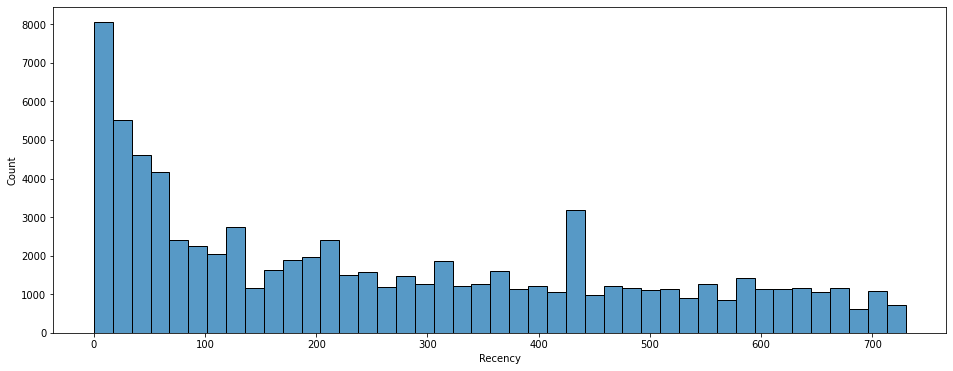

In [114]:
#sales_data_user['Recency'].plot.hist()
fig,axes = plt.subplots(figsize=(16,6))
sns.histplot(data=sales_data_user['Recency'],ax=axes)
plt.show()

In [115]:
#顯示客戶不活躍天數的統計資料
sales_data_user.Recency.describe()

count   78444.00
mean      259.36
std       216.96
min         0.00
25%        57.00
50%       212.00
75%       428.00
max       730.00
Name: Recency, dtype: float64

In [117]:
#function for ordering cluster numbers
#把cluster做排序
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

Elbow Method simply tells the optimal cluster number for optimal inertia

使用Elbow Method去找出要分幾群是最好的

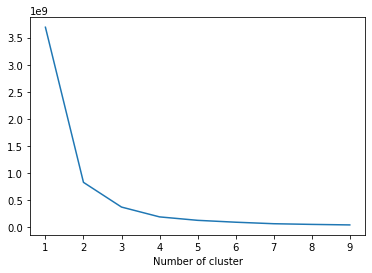

In [118]:
from sklearn.cluster import KMeans

sse={}
tx_recency = sales_data_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [119]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_data_user[['Recency']])
sales_data_user['RecencyCluster'] = kmeans.predict(sales_data_user[['Recency']])

sales_data_user = order_cluster('RecencyCluster', 'Recency',sales_data_user,False)

sales_data_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,12708.00,622.40,56.70,524.00,577.00,619.00,669.00,730.00
1,15650.00,423.84,53.25,329.00,377.00,427.00,464.75,523.00
2,17805.00,232.51,52.25,143.00,189.00,224.00,279.00,328.00
3,32281.00,51.51,40.47,0.00,17.00,42.00,81.00,142.00


#### Frequency 

In [120]:
#get order counts for each user and create a dataframe with it
tx_frequency = sales_data1.groupby('CustomerID').InvoiceDate.count().reset_index()
tx_frequency.columns = ['CustomerID','Frequency']

#add this data to our main dataframe
sales_data_user = pd.merge(sales_data_user, tx_frequency, on='CustomerID')
sales_data_user

,CustomerID,Recency,RecencyCluster,Frequency
0,9100002488768.00,123,3,23
1,9100000301403.00,82,3,37
2,9100000382303.00,13,3,76
3,9100000045758.00,54,3,91
4,9100000190649.00,34,3,104
...,...,...,...,...
78439,9100002763223.00,329,1,1
78440,9100002763049.00,329,1,2
78441,9100002763216.00,329,1,1
78442,9100002763240.00,329,1,2


##### plot

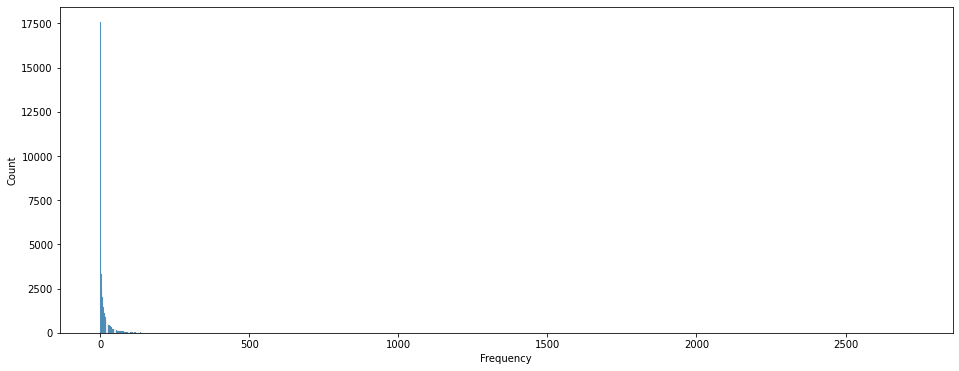

In [121]:
#sales_data_user['Frequency'].plot.hist()
fig,axes = plt.subplots(figsize=(16,6))
sns.histplot(data=sales_data_user['Frequency'],ax=axes)
plt.show()

In [122]:
tx_frequency.Frequency.describe()

count   78444.00
mean       15.06
std        29.15
min         1.00
25%         2.00
50%         5.00
75%        18.00
max      2723.00
Name: Frequency, dtype: float64

In [123]:
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_data_user[['Frequency']])
sales_data_user['FrequencyCluster'] = kmeans.predict(sales_data_user[['Frequency']])

#order the frequency cluster
sales_data_user = order_cluster('FrequencyCluster', 'Frequency',sales_data_user,True)

#see details of each cluster
sales_data_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,65770.00,6.53,6.86,1.00,1.00,3.00,10.00,27.00
1,11164.00,47.83,16.92,28.00,34.00,43.00,58.00,94.00
2,1507.00,140.42,63.06,95.00,106.00,122.00,150.00,1026.00
3,3.00,2121.00,549.93,1645.00,1820.00,1995.00,2359.00,2723.00


#### Revenue 

In [124]:
#calculate revenue for each customer
tx_revenue = sales_data1.groupby('CustomerID').Revenue.sum().reset_index()


#add this data to our main dataframe
sales_data_user = pd.merge(sales_data_user, tx_revenue, on='CustomerID')
sales_data_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,9100002488768.00,123,3,23,0,268088.00
1,9100002508831.00,16,3,25,0,276824.00
2,9100000183344.00,1,3,9,0,229888.00
3,9100001761848.00,61,3,20,0,197248.00
4,9100002514344.00,32,3,15,0,219224.00
...,...,...,...,...,...,...
78439,9100000502619.00,366,1,104,2,1693544.00
78440,9100000240023.00,349,1,124,2,2391704.00
78441,9100000092219.00,31,3,1995,3,7784488.00
78442,9100000300536.00,2,3,1645,3,26483688.00


##### plot

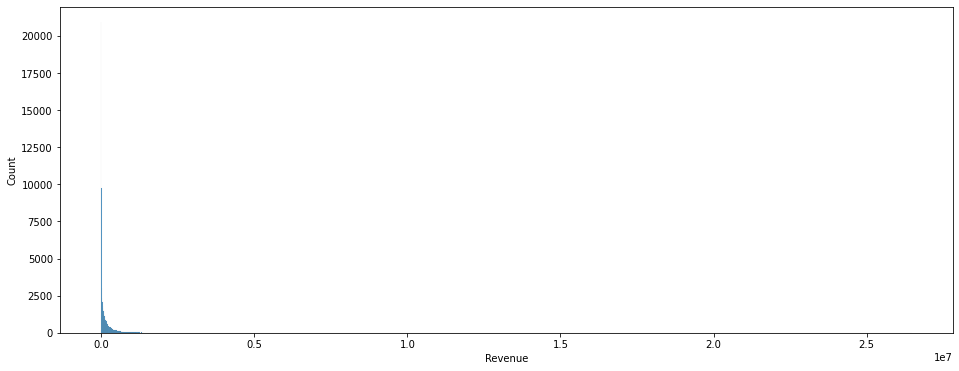

In [125]:
#sales_data_user['Frequency'].plot.hist()
fig,axes = plt.subplots(figsize=(16,6))
sns.histplot(data=sales_data_user['Revenue'],ax=axes)
plt.show()

In [126]:
sales_data_user.Revenue.describe()

count      78444.00
mean      166231.91
std       346774.33
min       -24584.00
25%         8048.00
50%        45868.00
75%       184792.00
max     26483688.00
Name: Revenue, dtype: float64

In [127]:
#apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_data_user[['Revenue']])
sales_data_user['RevenueCluster'] = kmeans.predict(sales_data_user[['Revenue']])


#order the cluster numbers
sales_data_user = order_cluster('RevenueCluster', 'Revenue',sales_data_user,True)
#show details of the dataframe
sales_data_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,64239.00,57435.29,69245.95,-24584.00,6884.00,20448.00,91652.00,268432.00
1,11839.00,480307.39,173331.09,268480.00,335604.00,434256.00,590980.00,936728.00
2,2243.00,1395827.14,416128.04,936768.00,1070676.00,1269864.00,1606060.00,2848216.00
3,123.00,4334236.81,2753306.96,2864664.00,3195500.00,3582080.00,4380288.00,26483688.00


### Customer Lifetime Value

#### Total score

In [128]:
#calculate overall score and use mean() to see details
#tx_user1
sales_data_user['OverallScore'] = sales_data_user['RecencyCluster'] + sales_data_user['FrequencyCluster'] + sales_data_user['RevenueCluster']


print(sales_data_user.groupby('OverallScore')['Recency'].mean())
print(sales_data_user.groupby('OverallScore')['Frequency'].mean())
print(sales_data_user.groupby('OverallScore')['Revenue'].mean())

OverallScore
0   622.52
1   424.66
2   237.14
3    68.02
4   102.24
5    41.97
6    36.09
7    22.71
8    11.78
9    13.00
Name: Recency, dtype: float64
OverallScore
0      2.74
1      3.79
2      6.41
3     10.26
4     30.82
5     47.25
6     81.99
7    129.94
8    281.02
9   2121.00
Name: Frequency, dtype: float64
OverallScore
0      20113.45
1      36365.02
2      61246.90
3     101994.21
4     353791.84
5     528002.23
6    1095716.05
7    1603494.73
8    4098855.12
9   14483736.00
Name: Revenue, dtype: float64


#### Labeling

In [129]:
sales_data_user['Segment'] = 'Low-Value'
sales_data_user.loc[sales_data_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
sales_data_user.loc[sales_data_user['OverallScore']>4,'Segment'] = 'High-Value' 
sales_data_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,9100002488768.00,123,3,23,0,268088.00,0,3,Mid-Value
1,9100000183344.00,1,3,9,0,229888.00,0,3,Mid-Value
2,9100001761848.00,61,3,20,0,197248.00,0,3,Mid-Value
3,9100002514344.00,32,3,15,0,219224.00,0,3,Mid-Value
4,9100002106044.00,1,3,20,0,165816.00,0,3,Mid-Value
...,...,...,...,...,...,...,...,...,...
78439,9100000304824.00,185,2,174,2,2913512.00,3,7,High-Value
78440,9100002708180.00,186,2,178,2,3081504.00,3,7,High-Value
78441,9100000092219.00,31,3,1995,3,7784488.00,3,9,High-Value
78442,9100000300536.00,2,3,1645,3,26483688.00,3,9,High-Value


#### Save to csv

In [130]:
sales_data_user.to_csv("/content/drive/MyDrive/Colab Notebooks/佐登妮絲/青年計劃/customer_segmentation_result.csv")

#### 課堂作業


In [131]:
sales_data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth,customer_type
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901,New
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901,Existing
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901,Existing
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,201901,Existing
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901,Existing


In [ ]:
top10_product = sales_data1.groupby('Description')['Revenue'].sum().reset_index().sort_values(by='Revenue',ascending=False).head(10)
top10_product

,Description,Revenue
38,BA-5肌密抗皺活妍霜60g,599162800.00
37,BA-5肌密抗皺原液(99%)20ml,452475200.00
496,白金密集煥白霜55g,397012688.00
140,全背順氣活力SPA課程單堂,354720200.00
495,白金密集煥白淡斑筆4.5ml*2,310611496.00
469,玻尿酸超保濕精華96%原液60ml,233624808.00
48,DC原生龍血素30ml,233514504.00
188,太極磁氧靚顏課程單堂,220149888.00
28,24H賦活液100ml,219720296.00
644,課程預付卡,216947032.00


In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')
myfont.get_family()
#sns.set(font=myfont.get_family())
#sns.set_style("whitegrid",{"font.sans-serif":['sans-serif']})
#myfont.get_family()


--2021-12-06 13:37:43--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.215.101, 173.194.215.102, 173.194.215.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.215.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0ppemklcb9d9sct3dh9quqv0jbc9gkc9/1638797850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-12-06 13:37:45--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0ppemklcb9d9sct3dh9quqv0jbc9gkc9/1638797850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.218.132, 2607:f8b0:400c:c14::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|1

['sans-serif']

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25239 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27963 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22925 missing from current font.
  font.set_

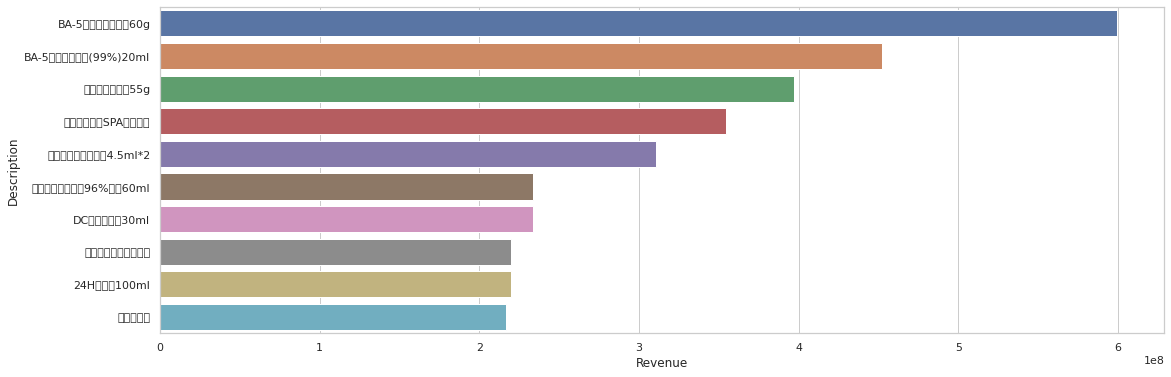

In [ ]:
figure,axis = plt.subplots(figsize=(18,6))
sns.barplot(x="Revenue",y="Description",data = top10_product,ax=axis)
plt.show()